In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import seaborn as sns
from scipy.stats import norm

#
sns.set_context("talk")

## Expectation model

In [2]:
df = pd.read_csv("../outputs/observed_variants_stats_synonymous.tsv", sep="\t")

/home/alex/miniconda3/ukb/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


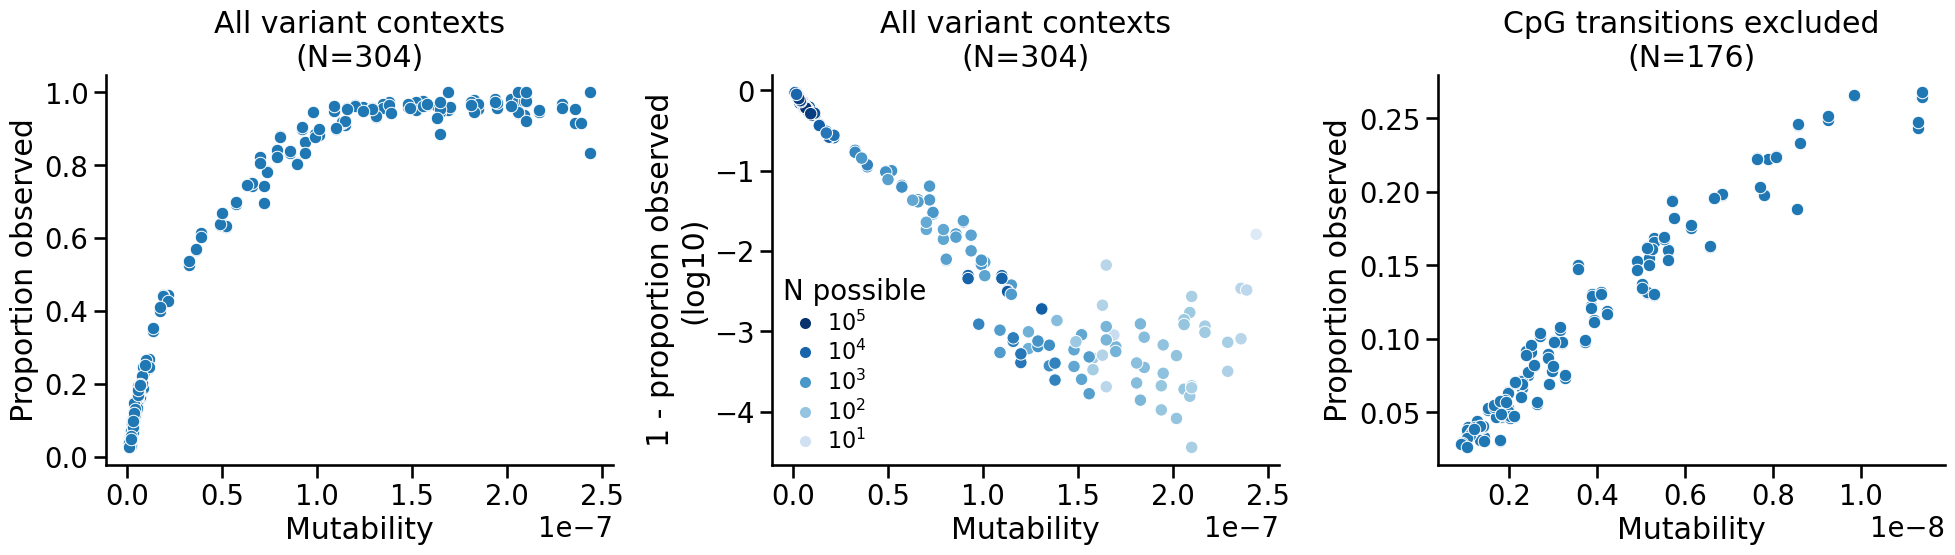

In [3]:
sns.set_context("talk", font_scale=1.2)

fig, (ax1, ax2, ax3) = plt.subplots(
    1,
    3,
    figsize=(20, 6),
)

# Axes 1
sns.scatterplot(
    ax=ax1,
    data=df,
    x=df["mu"],
    y=df["obs"] / df["pos"],
)
ax1.set_xlabel("Mutability")
ax1.set_ylabel("Proportion observed")
ax1.set_title("All variant contexts\n(N=304)")

# Axes 2
sns.scatterplot(
    ax=ax2,
    data=df,
    x=df["mu"],
    y=np.log(1 - df["obs"] / df["pos"]),
    hue=np.log10(df["pos"]),
    hue_norm=(0, max(np.log10(df["pos"]))),
    palette="Blues",
)
ax2.set_xlabel("Mutability")
ax2.set_ylabel("1 - proportion observed\n(log10)")
ax2.set_title("All variant contexts\n(N=304)")

## Axes 2 legend
cmap = plt.cm.Blues
legend_elements = [
    Line2D([0], [0], marker="o", color="w", markerfacecolor=cmap(0.2), label="$10^1$"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor=cmap(0.4), label="$10^2$"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor=cmap(0.6), label="$10^3$"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor=cmap(0.8), label="$10^4$"),
    Line2D([0], [0], marker="o", color="w", markerfacecolor=cmap(0.99), label="$10^5$"),
]

ax2.legend(
    title="N possible",
    handles=legend_elements[::-1],
    frameon=False,
    alignment="left",
    labelspacing=0.2,
    handletextpad=0,
    title_fontsize=20,
    fontsize=16,
    loc="lower left",
    borderpad=0
)

# Axes 3
sns.scatterplot(
    ax=ax3,
    data=df[df.variant_type != "CpG"],
    x="mu",
    y=df["obs"] / df["pos"],
)
ax3.set_xlabel("Mutability")
ax3.set_ylabel("Proportion observed")
ax3.set_title("CpG transitions excluded\n(N=176)")

# Figure
for ax in ax1, ax2, ax3:
    ax.spines["top"].set_color("None")
    ax.spines["right"].set_color("None")

plt.tight_layout()

plt.savefig("../plots/expecation_model_by_cpg.svg", format="svg")

## Constraint

In [4]:
df = pd.read_csv("../outputs/expected_variants_all_regions_no_cpg_stats.tsv", sep="\t")

### Z scores per transcript

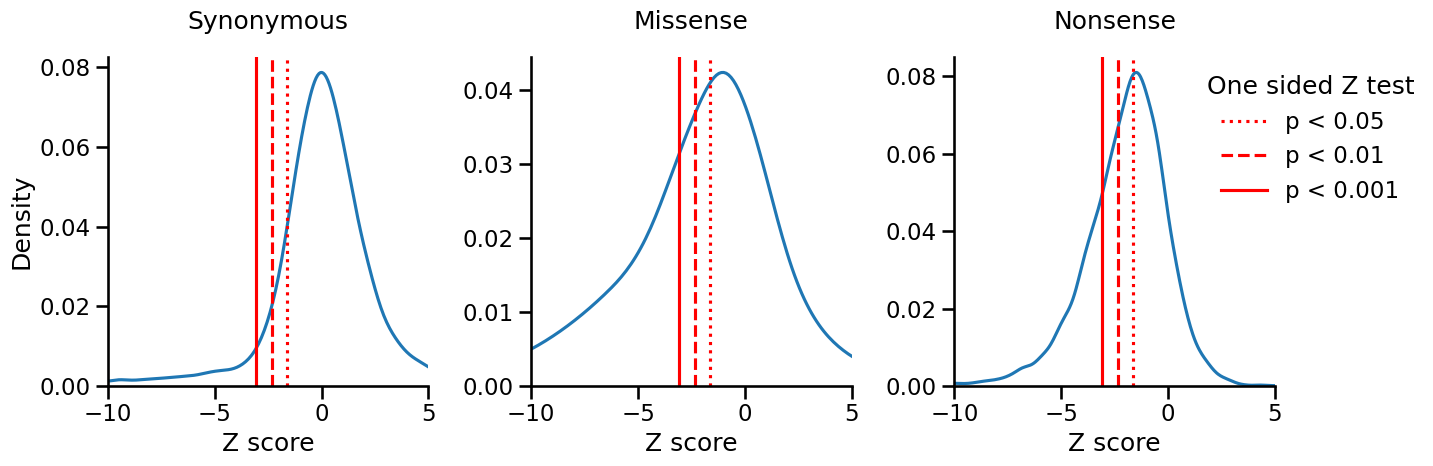

In [5]:
sns.set_context("talk")

csq = ["synonymous", "missense", "nonsense"]

g = sns.displot(
    kind="kde",
    data=df[df.region == "transcript"],
    x="z",
    col="csq",
    col_order=csq,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="Z score",
    xlim=(-10, 5),
)

for ax, c in zip(g.axes[0], [c.capitalize() for c in csq]):
    ax.set_title(c, pad=20)
    ax.axvline(x=norm.isf(0.95), color="r", linestyle=":", label="p < 0.05")
    ax.axvline(x=norm.isf(0.99), color="r", linestyle="--", label="p < 0.01")
    ax.axvline(x=norm.isf(0.999), color="r", linestyle="-", label="p < 0.001")
plt.legend(title="One sided Z test", loc="center right", bbox_to_anchor=(1.5, 0.75), frameon=False)
plt.tight_layout()

plt.savefig("../plots/constraint_z_in_transcripts_by_csq.svg", format="svg")

### O/E per transcript

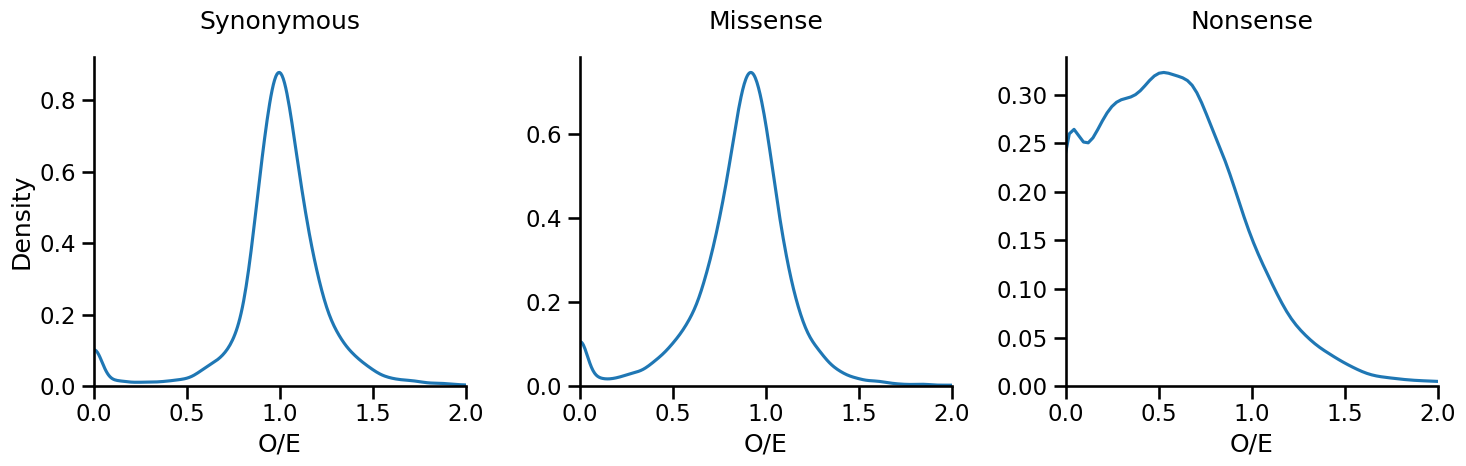

In [6]:
csq = ["synonymous", "missense", "nonsense"]

g = sns.displot(
    kind="kde",
    data=df[df.region == "transcript"],
    x=df["n_obs"] / df["n_exp"],
    col="csq",
    col_order=csq,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="O/E",
    xlim=(0, 2),
)

for ax, c in zip(g.axes[0], [c.capitalize() for c in csq]):
    ax.set_title(c, pad=20)

plt.tight_layout()
plt.savefig("../plots/constraint_oe_in_transcripts_by_csq.svg", format="svg")

### Nonsense Z score by region

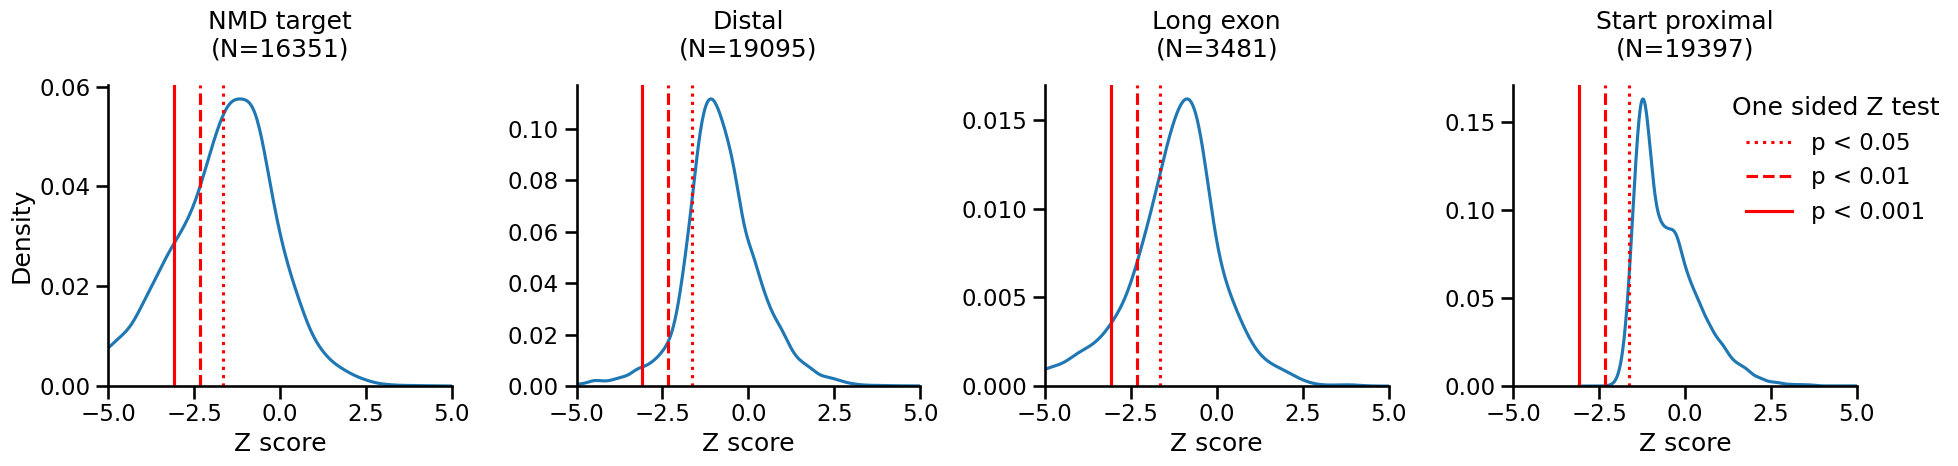

In [7]:
regions = ["nmd_target", "distal_nmd", "long_exon", "start_proximal"]
regions_title = ["NMD target", "Distal", "Long exon", "Start proximal"]
count = [
    df.loc[(df.region == r) & (df.csq == "nonsense"), "z"].count() for r in regions
]

g = sns.displot(
    kind="kde",
    data=df[df.csq == "nonsense"],
    x="z",
    col="region",
    col_order=regions,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="Z score",
    xlim=(-5, 5),
)

for ax, r, n in zip(g.axes[0], [r for r in regions_title], count):
    ax.set_title(f"{r}\n(N={n})", pad=20)
    ax.axvline(x=norm.isf(0.95), color="r", linestyle=":", label="p < 0.05")
    ax.axvline(x=norm.isf(0.99), color="r", linestyle="--", label="p < 0.01")
    ax.axvline(x=norm.isf(0.999), color="r", linestyle="-", label="p < 0.001")

plt.legend(title="One sided Z test", loc="center right", bbox_to_anchor=(1.3, 0.75), frameon=False)
plt.tight_layout()
plt.savefig("../plots/constraint_z_in_regions_nonsense.svg", format="svg")

### Nonsense P values by region before FDR correction

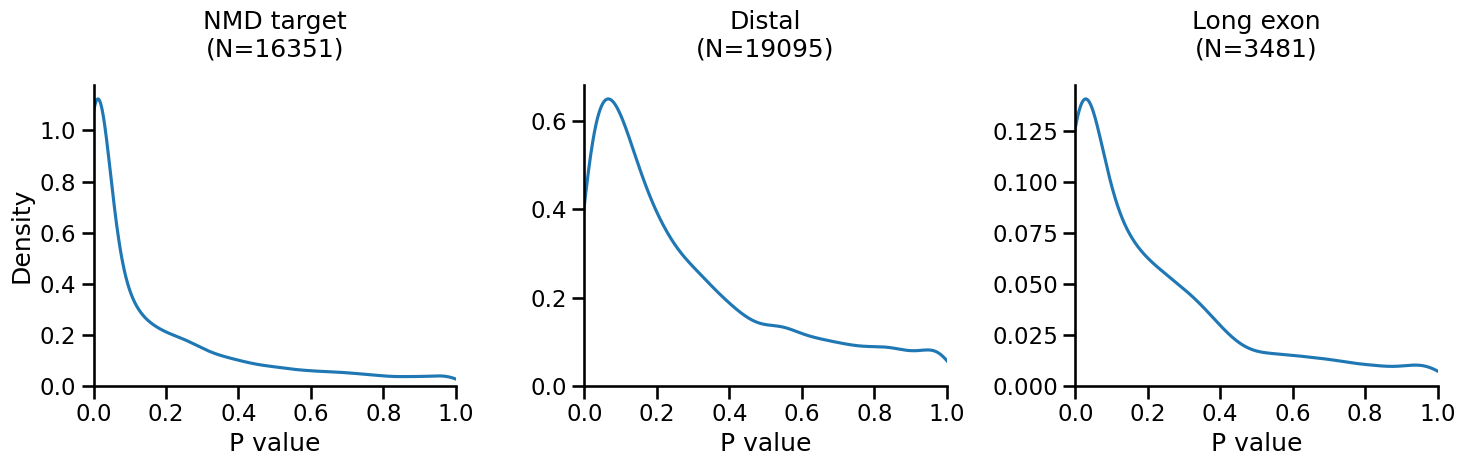

In [8]:
regions = ["nmd_target", "distal_nmd", "long_exon"]
regions_title = ["NMD target", "Distal", "Long exon"]
count = [
    df.loc[(df.region == r) & (df.csq == "nonsense"), "p"].count() for r in regions
]

g = sns.displot(
    kind="kde",
    data=df[df.csq == "nonsense"],
    x="p",
    col="region",
    col_order=regions,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="P value",
    xlim=(0, 1),
)

for ax, r, n in zip(g.axes[0], [r for r in regions_title], count):
    ax.set_title(f"{r}\n(N={n})", pad=20)

plt.tight_layout()
plt.savefig("../plots/constraint_p_in_regions_not_corrected.svg", format="svg")

### Nonsense P values by region with FDR correction

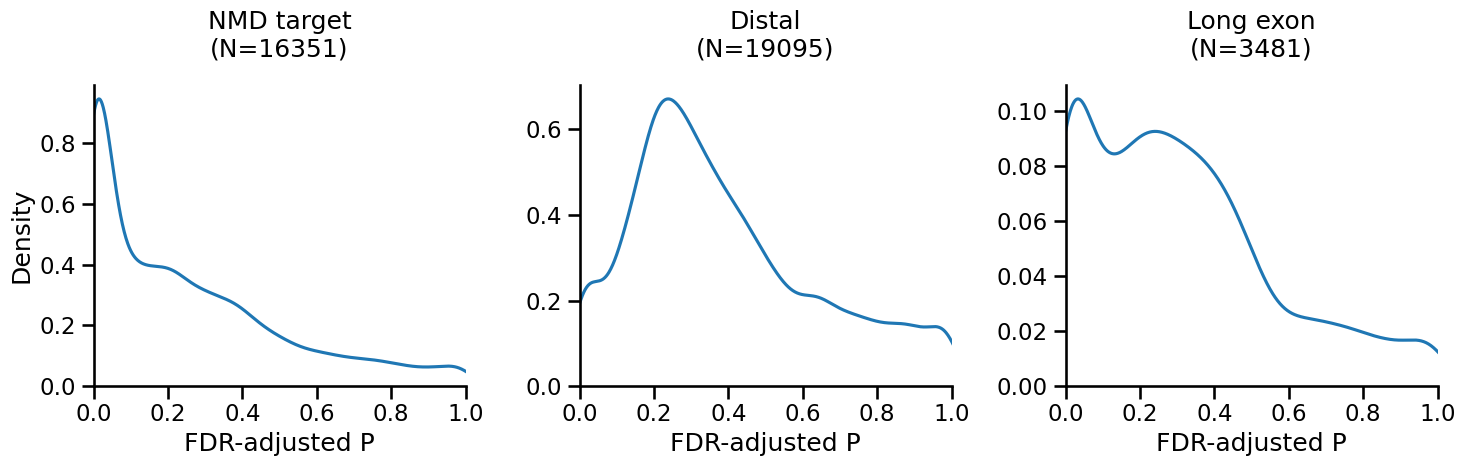

In [9]:
regions = ["nmd_target", "distal_nmd", "long_exon"]
regions_title = ["NMD target", "Distal", "Long exon"]
count = [
    df.loc[(df.region == r) & (df.csq == "nonsense"), "p"].count() for r in regions
]

g = sns.displot(
    kind="kde",
    data=df[df.csq == "nonsense"],
    x="fdr_p",
    col="region",
    col_order=regions,
    facet_kws=dict(sharey=False),
    common_norm=True,
    common_grid=False,
    gridsize=1000,
)
g.set(
    xlabel="FDR-adjusted P",
    xlim=(0, 1),
)

for ax, r, n in zip(g.axes[0], [r for r in regions_title], count):
    ax.set_title(f"{r}\n(N={n})", pad=20)

plt.tight_layout()
plt.savefig("../plots/constraint_p_in_regions_fdr_corrected.svg", format="svg")